In [1]:
# Import necessary libraries
import tensorflow.keras as tk  # TensorFlow Keras for building the model and dataset
import matplotlib.pyplot as plt  # For plotting images and visualizations
import numpy as np  # For numerical operations

In [2]:
# Load the MNIST dataset
mnist = tk.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Print the number of training and testing samples
print(len(train_images), len(test_images))

60000 10000


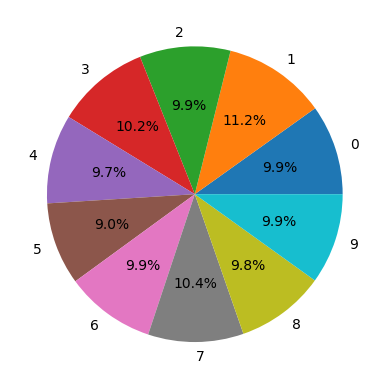

In [6]:
# Get unique values and their counts from the training labels
unique_values, value_counts = np.unique(train_labels, return_counts=True)

# Create a pie chart to visualize the distribution of labels in the dataset
# `value_counts` specifies the size of each pie slice
# `labels=unique_values` assigns the corresponding unique labels to each slice
# `autopct='%1.1f%%'` displays the percentage of each label within the dataset
plt.pie(value_counts, labels=unique_values, autopct='%1.1f%%')

# Display the pie chart
plt.show()

In [4]:
# Print the shape of the first training image
print(train_images[0].shape)

(28, 28)


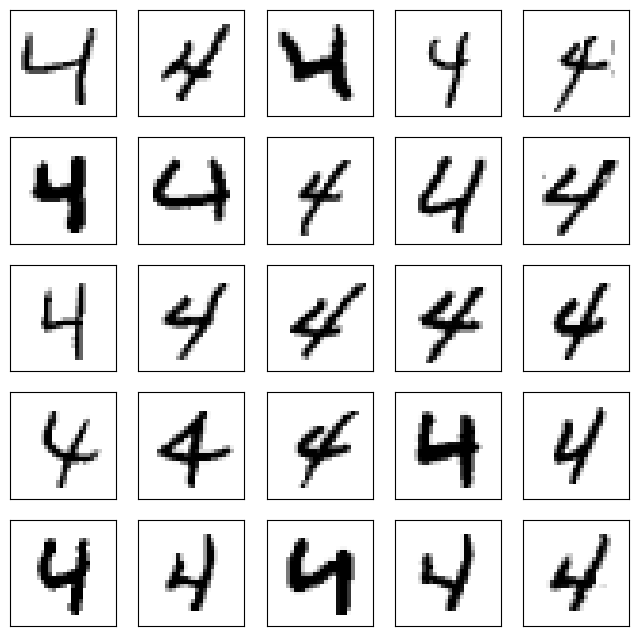

In [18]:
# Set the maximum number of images to display
max_4 = 25

# Initialize a list to store images of the digit '4'
images_4 = []

# Loop through the training labels
for i in range(len(train_labels)):
    # Check if the current label corresponds to the digit '4'
    if train_labels[i] == 4:
        # Append the corresponding image to the list
        images_4.append(train_images[i])

        # Stop adding images once the list reaches the desired maximum size (25)
        if len(images_4) == max_4:
            break

# Define the number of rows and columns for the grid of images
rows = 5  # Number of rows in the grid
cols = 5  # Number of columns in the grid

# Create a figure to display the images in a grid
plt.figure(figsize=(8, 8))  # Set the figure size (8x8 inches)

# Loop through the selected images of the digit '4'
for i in range(max_4):
    # Create a subplot within the grid for each image
    plt.subplot(rows, cols, i + 1)  # Specify the grid position for this subplot

    # Remove the x and y ticks for a cleaner display
    plt.xticks([])
    plt.yticks([])

    # Display the image in grayscale with a binary color map
    plt.imshow(images_4[i], cmap=plt.cm.binary)

# Show the grid of images
plt.show()

In [19]:
# Normalize the pixel values for training and testing data (Scale between 0 and 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the neural network model using a Sequential architecture
model = tk.Sequential([
    # Flatten the 28x28 image into a 1D array
    tk.layers.Flatten(input_shape=(28, 28)),
    # Fully connected layer with 512 neurons and ReLU activation
    tk.layers.Dense(units=512, activation='relu'),
    # Fully connected layer with 256 neurons and ReLU activation
    tk.layers.Dense(units=256, activation='relu'),
    # Fully connected layer with 128 neurons and ReLU activation
    tk.layers.Dense(units=128, activation='relu'),
    # Fully connected output layer with 10 neurons (for digit classification) and softmax activation
    tk.layers.Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data for 10 epochs
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8991 - loss: 0.3319
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9714 - loss: 0.0925
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.9823 - loss: 0.0580
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9855 - loss: 0.0475
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9893 - loss: 0.0371
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9910 - loss: 0.0285
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9914 - loss: 0.0278
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9921 - loss: 0.0251
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9942 - loss: 0.0190
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9941 - loss: 0.0193


In [21]:
# Evaluate the model on the test data to get loss and accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)  # Print the accuracy on test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9735 - loss: 0.1325
Test accuracy: 0.9775000214576721


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


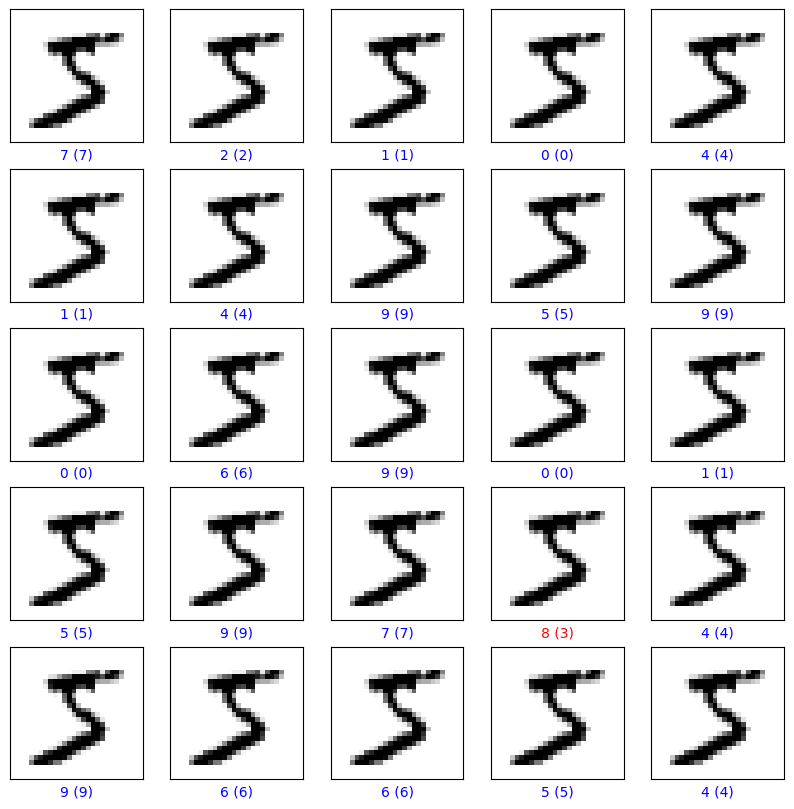

In [22]:
# Make predictions using the trained model
predictions = model.predict(test_images)

# Visualize predictions for the first 25 test images
plt.figure(figsize=(10, 10))  # Set the figure size
for i in range(25):
    plt.subplot(5, 5, i + 1)  # Set up grid

    # Remove ticks for cleaner visualization
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the test image
    plt.imshow(train_images[0], cmap=plt.cm.binary)

    # Determine the predicted and true labels
    predict_label = np.argmax(predictions[i])
    true_label = test_labels[i]

    # Set color to "blue" if prediction is correct; otherwise, "red"
    if predict_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # Display the predicted and true label in the grid title
    plt.xlabel("{} ({})".format(predict_label, true_label), color=color)

plt.show()  # Display the prediction grid